# 

In [1]:
import pyreadr
import numpy as np
import pandas as pd
import swifter
import matplotlib.pyplot as plt
import seaborn as sns


import numpy as np
import scipy.stats as stats
from scipy.linalg import eigh
import pickle
from itertools import product

In [2]:
from fault_detection_algorithms.PCAFaultDetector import PCAFaultDetector
from fault_detection_algorithms.PLSFaultDetector import PLSFaultDetector 
from fault_detection_algorithms.fault_detector import BaseFaultDetectionAlgorithm 
from utils_ import plot_all_roc_curves

In [3]:
from fast_dataset_open import open_with_cache

In [135]:
import importlib
import fault_detection_algorithms.PCAFaultDetector
import fault_detection_algorithms.PLSFaultDetector
import fault_detection_algorithms.fault_detector
import utils_

importlib.reload(fault_detection_algorithms.PCAFaultDetector)
importlib.reload(fault_detection_algorithms.PLSFaultDetector)
importlib.reload(fault_detection_algorithms.fault_detector)
importlib.reload(utils_)

from fault_detection_algorithms.PCAFaultDetector import PCAFaultDetector
from fault_detection_algorithms.PLSFaultDetector import PLSFaultDetector
from fault_detection_algorithms.fault_detector import BaseFaultDetectionAlgorithm
from utils_ import plot_all_roc_curves


In [5]:
# constants
datasets_dir = "datasets"
dataset_dir = f"./{datasets_dir}/TEP/"

In [6]:
X_columns= [ 'xmeas_1', 'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7', 'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13', 'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19', 'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmv_1', 'xmv_2', 'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10', 'xmv_11']

In [91]:
test_df = open_with_cache(f"{dataset_dir}/TEP_Faulty_Testing.RData", f"{dataset_dir}/TEP_FaultFree_Testing.RData")

Loading from cache: cache_data/38ed105d1e51ef36e954d9df89414b6e.pkl


In [131]:
model_pca = BaseFaultDetectionAlgorithm.load("models/pca_fault_detector_with_resi_scale.pickle")
# model_pca.J_th_SPE = 37.03911226962255
# model_pca.J_th_T2 = 51.421568332998696

In [105]:
model_pls = BaseFaultDetectionAlgorithm.load("models/pls_fault_detector.pickle")

In [94]:
x_test = test_df[X_columns].values

In [95]:
expected_fault = test_df["sample"]>160
expected_fault[test_df["faultNumber"]==0] = False# non faulty test

In [132]:

result_pls = model_pca.evaluate(x_test, expected_fault, test_df["faultNumber"], roc_curve=True)

/home/usuario/GhentInternship/fault_detection_algorithms/fault_detector.py:143: RuntimeWarning: invalid value encountered in scalar divide
  "Fault Detection Rate": TP / (TP + FN),
/home/usuario/GhentInternship/fault_detection_algorithms/fault_detector.py:144: RuntimeWarning: invalid value encountered in scalar divide
  "False Detection Rate": FP / (TP + FP),


In [12]:
result_pls = model_pls.evaluate(x_test, expected_fault, test_df["faultNumber"], roc_curve=True)

/home/usuario/GhentInternship/fault_detection_algorithms/fault_detector.py:143: RuntimeWarning: invalid value encountered in scalar divide
  "Fault Detection Rate": TP / (TP + FN),


In [133]:
print("Global")
print(f"FAR(false alarm rate) {result_pls['global']['False Alarm Rate']}" )
print(f"TDR(fault detection rate) {result_pls['global']['Fault Detection Rate']}" )
print(f"FDR(false detection rate) {result_pls['global']['False Detection Rate']}" )
print()

ordering = [0, 1,2,4,5,6,7,8,12,13,14,17,18,10,11,16,19,20, 3,9,15]
#ordering = [0, 8, 9,10, 11, 12, 13, 1,2,4,6,7,17,18,20,3,5,14,15,16,19]
for fault_num in ordering:
    metrics = result_pls["by_fault"][fault_num]
    print(f"Fault: {fault_num}")
    if fault_num==0:
        print(f"FAR(false alarm rate) {metrics['False Alarm Rate']}" )
    else:
        print(f"TDR(fault detection rate) {metrics['Fault Detection Rate']}" )
        print(f"FDR(false detection rate) {metrics['False Detection Rate']}" )
        print(f"FAR(false alarm rate) {metrics['False Alarm Rate']}" )
    print()


Global
FAR(false alarm rate) 0.015554326923076922
TDR(fault detection rate) 0.8196975
FDR(false detection rate) 0.004909458108299432

Fault: 0
FAR(false alarm rate) 0.02094375

Fault: 1
TDR(fault detection rate) 0.99806
FDR(false detection rate) 0.0027851395941939205
FAR(false alarm rate) 0.0139375

Fault: 2
TDR(fault detection rate) 0.9845075
FDR(false detection rate) 0.0028233709276356106
FAR(false alarm rate) 0.0139375

Fault: 4
TDR(fault detection rate) 0.99989
FDR(false detection rate) 0.0027800563989917
FAR(false alarm rate) 0.0139375

Fault: 5
TDR(fault detection rate) 1.0
FDR(false detection rate) 0.002779751442853047
FAR(false alarm rate) 0.0139375

Fault: 6
TDR(fault detection rate) 1.0
FDR(false detection rate) 0.002779751442853047
FAR(false alarm rate) 0.0139375

Fault: 7
TDR(fault detection rate) 1.0
FDR(false detection rate) 0.002779751442853047
FAR(false alarm rate) 0.0139375

Fault: 8
TDR(fault detection rate) 0.9776025
FDR(false detection rate) 0.0028432562551637614
FA

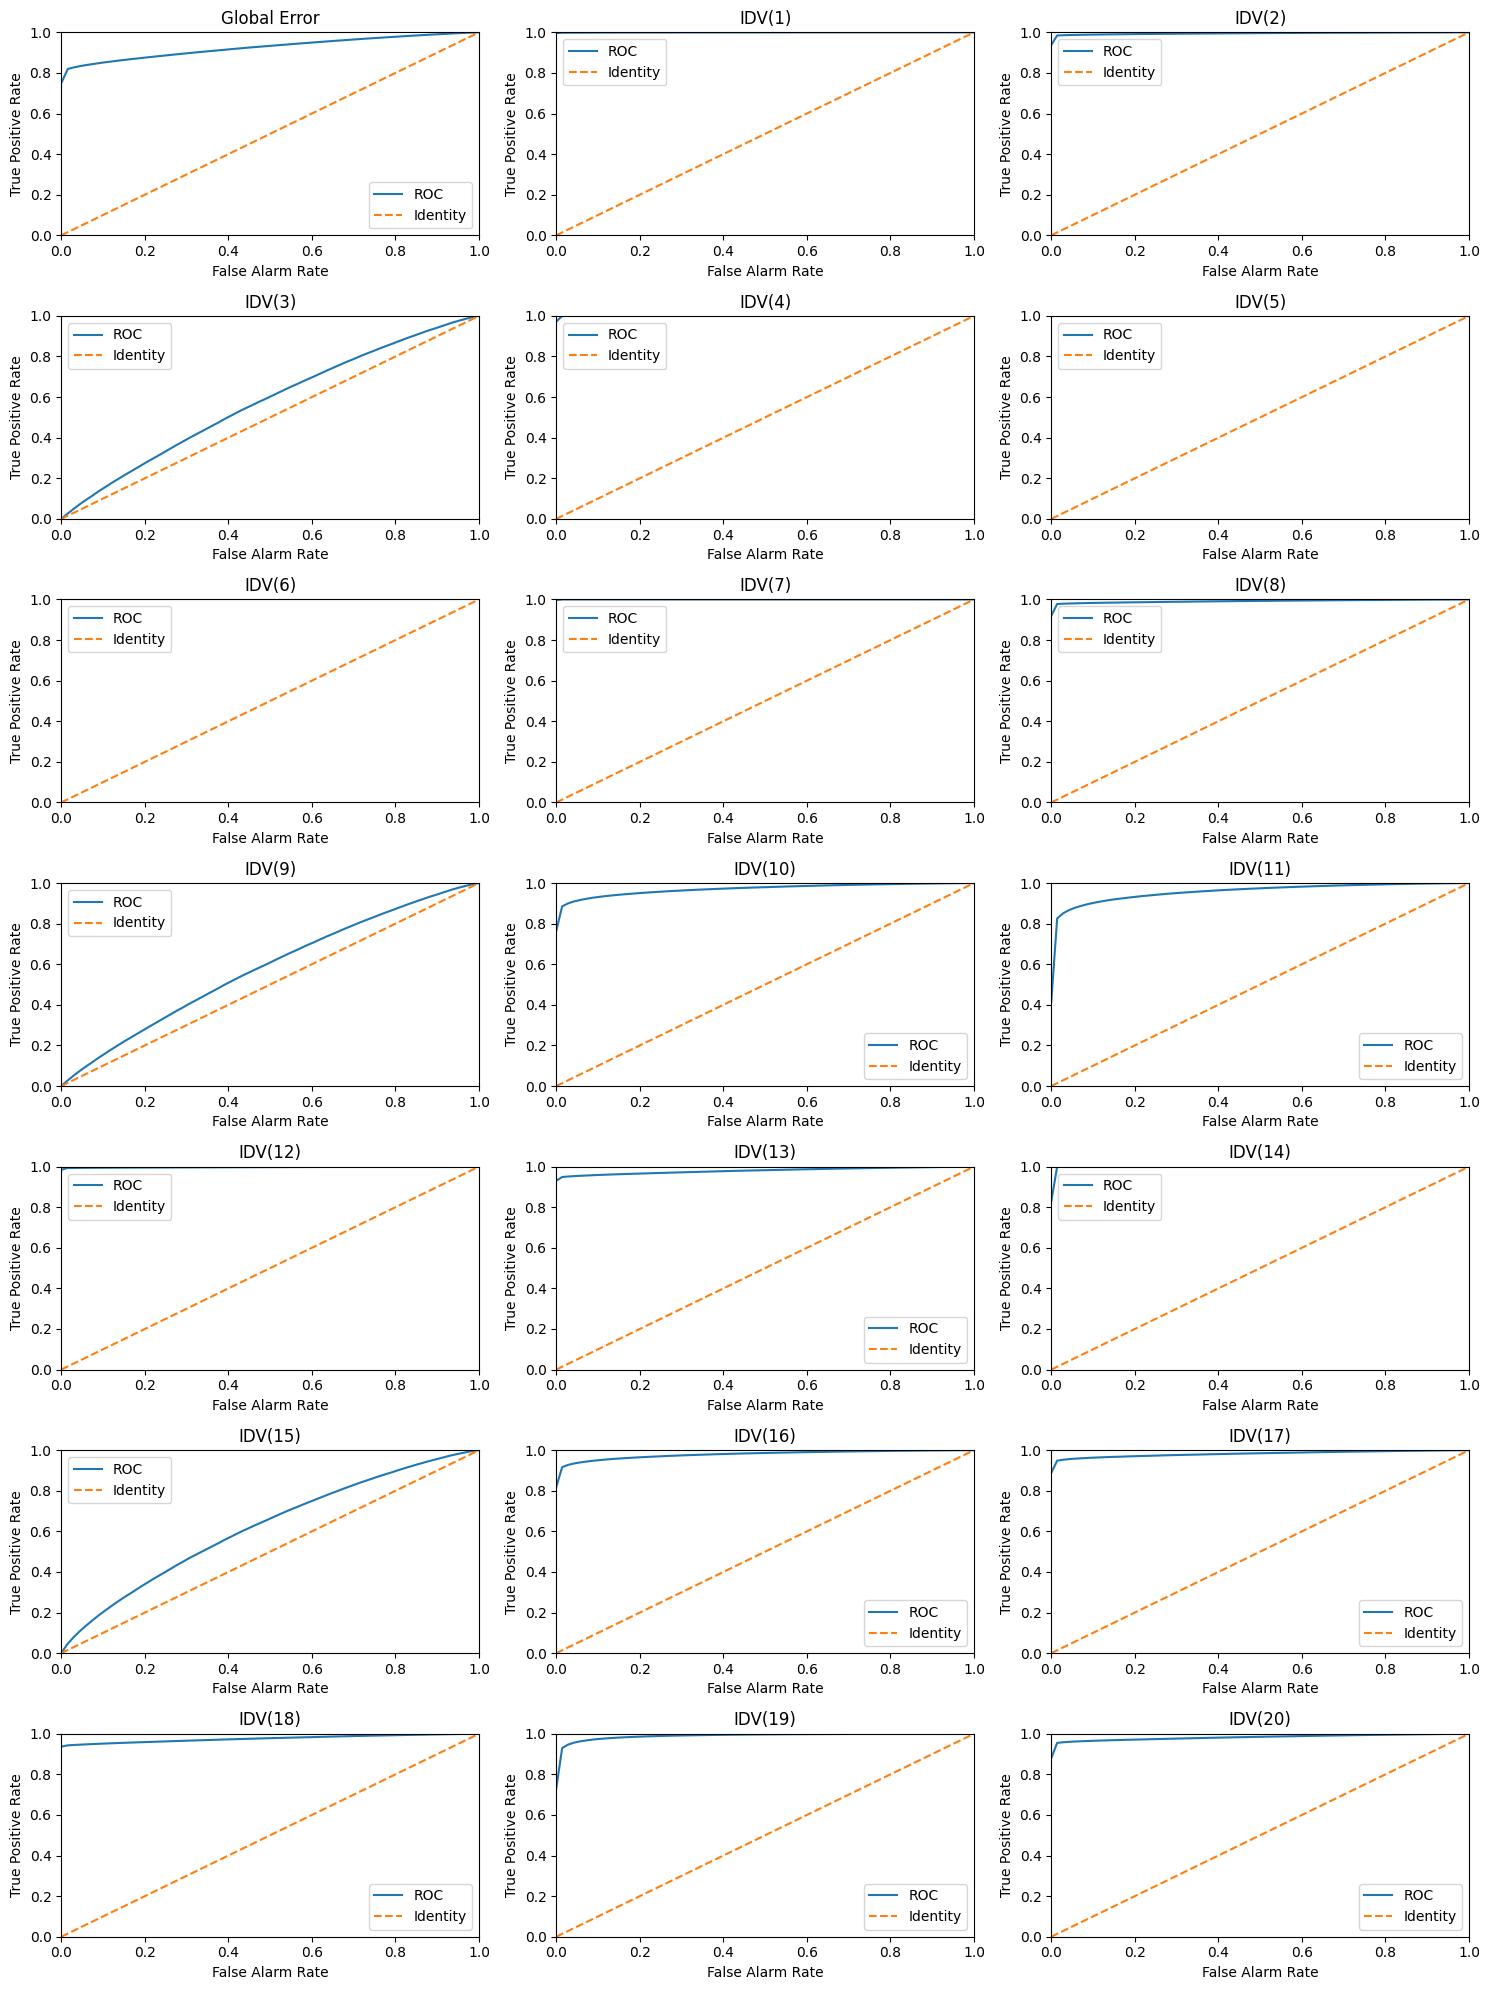

In [136]:
plot_all_roc_curves(result_pls["roc_data"])

In [126]:
print(result_pls["roc_data"]["global"]["False Alarm Rate"][-2])
print(result_pls["roc_data"]["global"]["Fault Detection Rate"][-2])
print(model_pca.thresholds[-2])
print(model_pca.confidence_levels[-2])


0.0012759615384615385
0.802459375
(37.03911226962255, 51.421568332998696)
0.999974619393433


In [62]:
model_pca.J_th_T2, model_pca.J_th_T2

(33.41002735899585, 33.41002735899585)

In [63]:
from sklearn.metrics import roc_curve

In [114]:
indicators = model_pca.compute_indicators(x_test)

In [115]:
fpr, tpr, _= roc_curve(expected_fault,indicators[0])
fpr2, tpr2, _= roc_curve(expected_fault,indicators[1])

In [116]:
ind0_vals = np.sort(indicators[0])[::len(indicators[0])//50]
ind1_vals = np.sort(indicators[1])[::len(indicators[1])//50]

In [84]:
from itertools import product


In [117]:
inds_combinations = list(product(ind0_vals, ind1_vals))
roc_results_ = dict()
for idx, (ind0, ind1) in enumerate(inds_combinations):
    print(idx/len(inds_combinations))
    predicted = model_pca.detect_faults(indicators, (ind0,ind1))
    roc_results_[(ind0, ind1)] = BaseFaultDetectionAlgorithm.compute_error_metrics(predicted,expected_fault)

0.0
0.0004
0.0008
0.0012
0.0016
0.002
0.0024
0.0028
0.0032
0.0036
0.004
0.0044
0.0048
0.0052
0.0056
0.006
0.0064
0.0068
0.0072
0.0076
0.008
0.0084
0.0088
0.0092
0.0096
0.01
0.0104
0.0108
0.0112
0.0116
0.012
0.0124
0.0128
0.0132
0.0136
0.014
0.0144
0.0148
0.0152
0.0156
0.016
0.0164
0.0168
0.0172
0.0176
0.018
0.0184
0.0188
0.0192
0.0196
0.02
0.0204
0.0208
0.0212
0.0216
0.022
0.0224
0.0228
0.0232
0.0236
0.024
0.0244
0.0248
0.0252
0.0256
0.026
0.0264
0.0268
0.0272
0.0276
0.028
0.0284
0.0288
0.0292
0.0296
0.03
0.0304
0.0308
0.0312
0.0316
0.032
0.0324
0.0328
0.0332
0.0336
0.034
0.0344
0.0348
0.0352
0.0356
0.036
0.0364
0.0368
0.0372
0.0376
0.038
0.0384
0.0388
0.0392
0.0396
0.04
0.0404
0.0408
0.0412
0.0416
0.042
0.0424
0.0428
0.0432
0.0436
0.044
0.0444
0.0448
0.0452
0.0456
0.046
0.0464
0.0468
0.0472
0.0476
0.048
0.0484
0.0488
0.0492
0.0496
0.05
0.0504
0.0508
0.0512
0.0516
0.052
0.0524
0.0528
0.0532
0.0536
0.054
0.0544
0.0548
0.0552
0.0556
0.056
0.0564
0.0568
0.0572
0.0576
0.058
0.0584
0.0588
0

In [118]:
fdr = [err_met["Fault Detection Rate"] for err_met in roc_results_.values()]
far = [err_met["False Alarm Rate"] for err_met in roc_results_.values()]

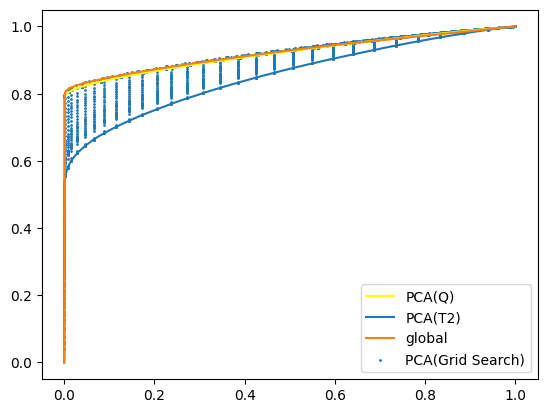

In [119]:
plt.plot(fpr, tpr, label= "PCA(Q)",c="yellow")
plt.plot(fpr2, tpr2, label= "PCA(T2)")
plt.plot(result_pls["roc_data"]["global"]["False Alarm Rate"], result_pls["roc_data"]["global"]["Fault Detection Rate"], label= "global")
plt.scatter(far, fdr, label= "PCA(Grid Search)", s=1)
plt.legend()
